In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [18]:
filepath = "results/radar_target_recognition_snr_with_jitter.csv"

df = pd.read_csv(filepath)
df.head()

,accuracy_single,accuracy,model_choice,dataset_choice,MC_Trials,azimuth_jitter_bounds,color,n_radars,single_method,elevation_center,...,azimuth_center,SNR_constraint,azimuth_spread,azimuth_jitter_width,fusion_method,experiment_name,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name
0,0.522610,0.799439,mlp,distributed,10,0_180,color,100,random,0,...,90,20,180,10,fusion,radar_target_recognition_snr_with_jitter,mlp,potter.mi,LOCAL,main_mc_SNR.py
1,0.497305,0.738936,mlp,distributed,10,0_180,color,100,random,0,...,90,20,180,20,fusion,radar_target_recognition_snr_with_jitter,mlp,potter.mi,LOCAL,main_mc_SNR.py
2,0.446225,0.650699,mlp,distributed,10,0_180,color,100,random,0,...,90,20,180,50,fusion,radar_target_recognition_snr_with_jitter,mlp,potter.mi,LOCAL,main_mc_SNR.py
3,0.539835,0.860184,mlp,distributed,10,0_180,color,100,random,0,...,90,20,180,0,fusion,radar_target_recognition_snr_with_jitter,mlp,potter.mi,LOCAL,main_mc_SNR.py
4,0.441985,0.647725,mlp,distributed,10,0_180,white,100,random,0,...,90,20,180,50,fusion,radar_target_recognition_snr_with_jitter,mlp,potter.mi,LOCAL,main_mc_SNR.py


In [12]:
group

,accuracy_single,accuracy,model_choice,dataset_choice,MC_Trials,azimuth_jitter_bounds,color,n_radars,single_method,elevation_center,...,SNR_constraint,azimuth_spread,azimuth_jitter_width,fusion_method,experiment_name,tags.mlflow.runName,tags.mlflow.user,tags.mlflow.source.type,tags.mlflow.source.name,combined_jitter_width
535,0.268580,0.411172,xgboost,distributed,10,0_180,color,20,random,0,...,-20,180,0,fusion,radar_target_recognition_snr_with_jitter,xgboost,potter.mi,LOCAL,main_mc_SNR.py,0.0
537,0.265325,0.399805,xgboost,distributed,10,0_180,color,20,random,0,...,-20,180,10,fusion,radar_target_recognition_snr_with_jitter,xgboost,potter.mi,LOCAL,main_mc_SNR.py,10.0
540,0.243610,0.334525,xgboost,distributed,10,0_180,color,20,random,0,...,-20,180,50,fusion,radar_target_recognition_snr_with_jitter,xgboost,potter.mi,LOCAL,main_mc_SNR.py,50.0
541,0.260035,0.377595,xgboost,distributed,10,0_180,color,20,random,0,...,-20,180,20,fusion,radar_target_recognition_snr_with_jitter,xgboost,potter.mi,LOCAL,main_mc_SNR.py,20.0


C:\Users\lpott\AppData\Local\Temp\ipykernel_25380\2451745173.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)


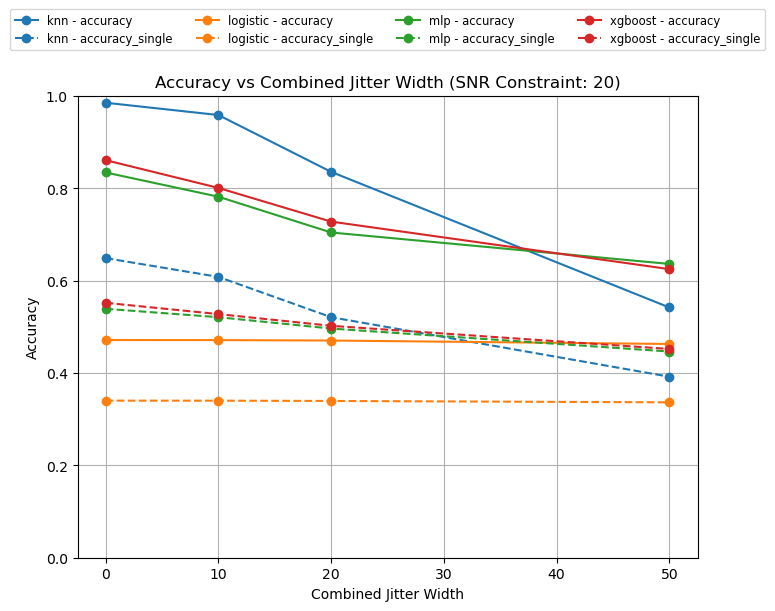

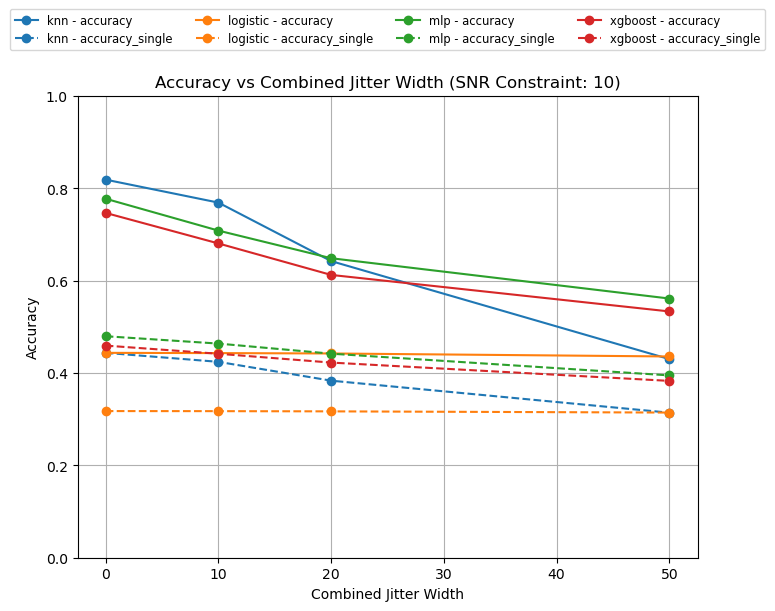

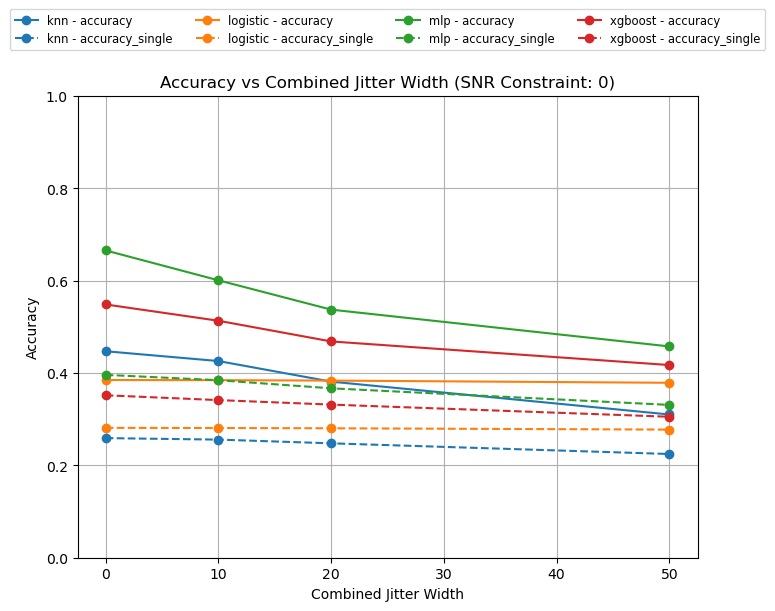

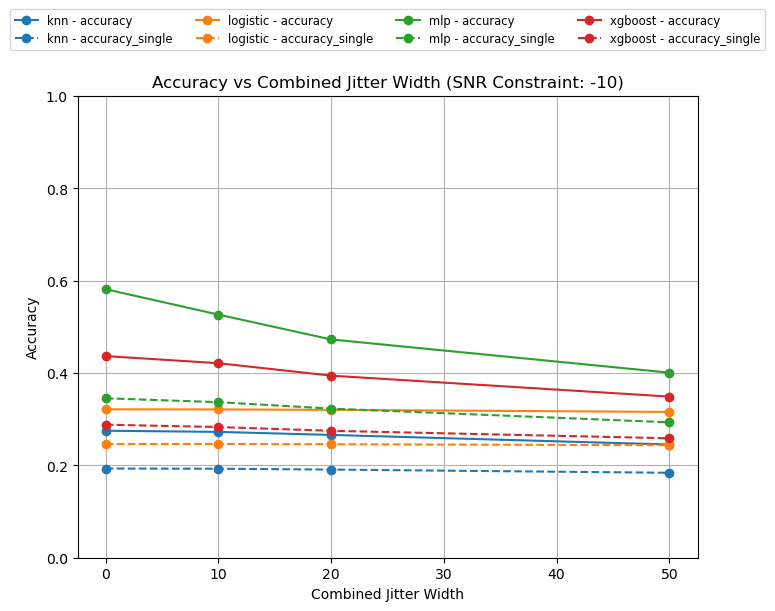

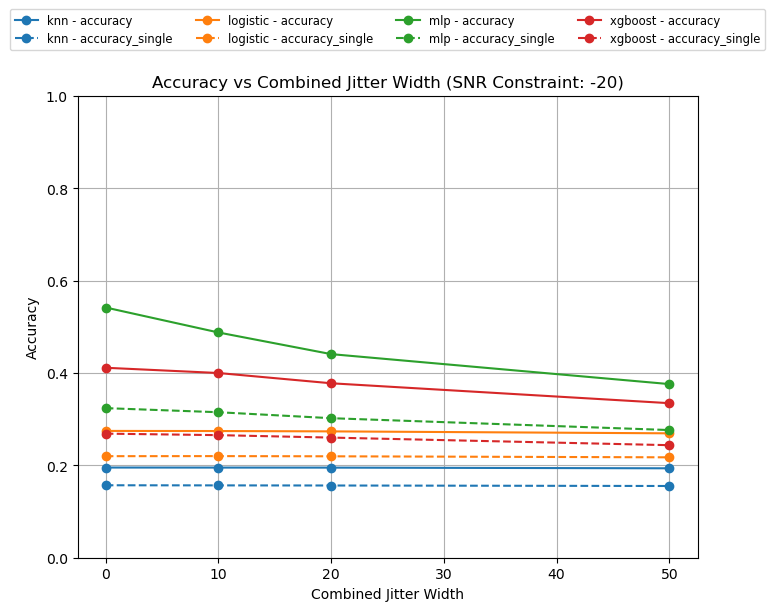

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
filtered_data = df[
    (df['n_radars'] == 20) &
    (df['fusion_method'] == 'fusion') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

# Get unique SNR_constraint values
unique_snr_values = filtered_data['SNR_constraint'].unique()

# Assign colors to each unique model
models = sorted(filtered_data['model_choice'].unique())
colors = plt.cm.tab10.colors[:len(models)]  # Using a colormap with sufficient distinct colors
model_color_dict = {model: color for model, color in zip(models, colors)}

# Plotting for each unique SNR_constraint value
for snr_value in unique_snr_values:
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]
    
    # Sort the data by combined jitter width
    snr_filtered_data = snr_filtered_data.sort_values(by='combined_jitter_width')
    
    plt.figure(figsize=(8, 6))
    
    for model in models:
        model_data = snr_filtered_data[snr_filtered_data['model_choice'] == model]
        color = model_color_dict[model]  # Get the color for the current model
        
        plt.plot(model_data['combined_jitter_width'], model_data['accuracy'], marker='o', linestyle='-', label=f'{model} - accuracy', color=color)
        
        # Overlay single accuracy onto the plot
        plt.plot(model_data['combined_jitter_width'], model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color)

    plt.xlabel('Combined Jitter Width')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Combined Jitter Width (SNR Constraint: {snr_value})')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    
    # Create a single legend for all plots with consistent colors for each model
    plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(models), fontsize='small')
    
    plt.grid(True)
    plt.ylim([0, 1])
    plt.show()


C:\Users\lpott\AppData\Local\Temp\ipykernel_25380\3346899162.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)


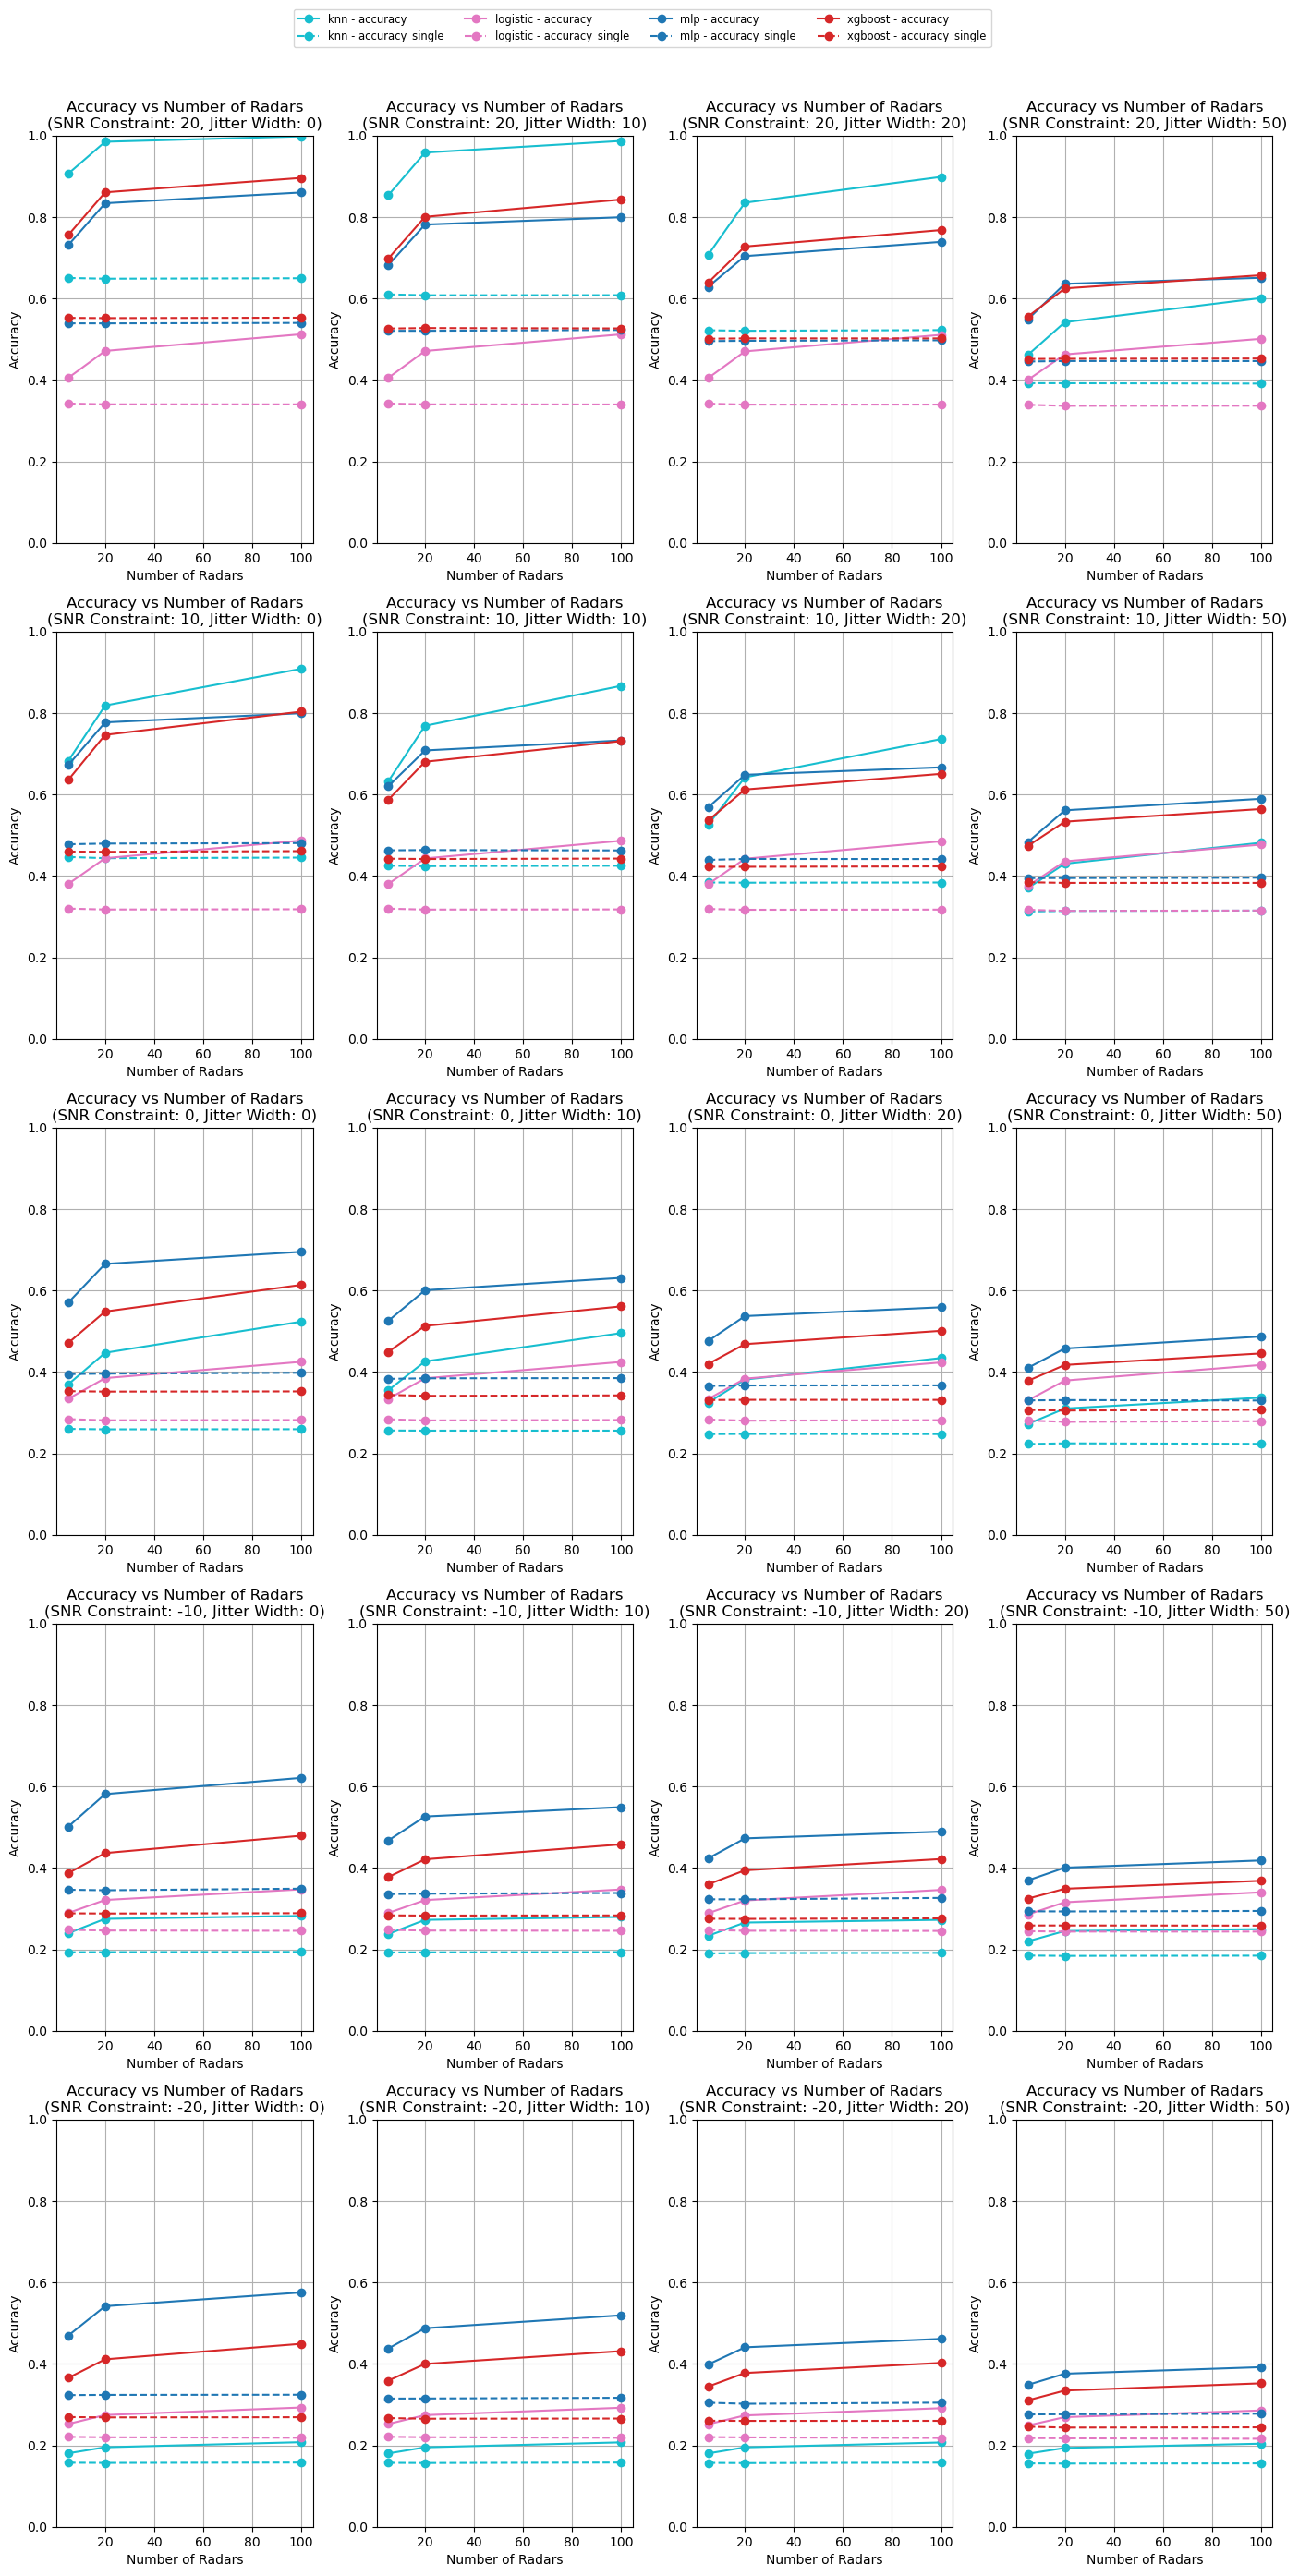

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
filtered_data = df[
    (df['fusion_method'] == 'fusion') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

# Set the index to 'model_choice' and 'n_radars'
filtered_data.set_index(['model_choice', 'n_radars'], inplace=True)

# Get unique SNR_constraint values
unique_snr_values = filtered_data['SNR_constraint'].unique()

# Assign unique colors to each model
models = filtered_data.index.get_level_values('model_choice').unique()
colors = plt.cm.get_cmap('tab10', len(models))  # Get a colormap with a color for each model
model_color_dict = {model: colors(i) for i, model in enumerate(models)}

# Create a single plot for both elevation and azimuth jitter widths
unique_jitter_widths = np.sort(filtered_data["azimuth_jitter_width"].unique())

fig, axs = plt.subplots(len(unique_snr_values), len(unique_jitter_widths), figsize=(14, 6 * len(unique_snr_values)))

legend_dict = {}  # Dictionary to store unique legend items

for i, snr_value in enumerate(unique_snr_values):
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]

    for idx, jitter_width in enumerate(unique_jitter_widths):
        # Plotting number of radars vs. accuracy for each model
        ax = axs[i, idx]
        for model in sorted(models):  # Sort models alphabetically
            model_data = snr_filtered_data.loc[model]
            model_data = model_data.loc[model_data.azimuth_jitter_width == jitter_width]  # Filtering for each model
            model_data = model_data.sort_values('n_radars')  # Sort by number of radars
            color = model_color_dict[model]
            
            line1 = ax.plot(model_data.index, model_data['accuracy'], marker='o', linestyle='-', label=f'{model} - accuracy', color=color)
            line2 = ax.plot(model_data.index, model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color)
            
            # Collect unique legend items
            if f'{model} - accuracy' not in legend_dict:
                legend_dict[f'{model} - accuracy'] = line1[0]
            if f'{model} - accuracy_single' not in legend_dict:
                legend_dict[f'{model} - accuracy_single'] = line2[0]

        ax.set_xlabel('Number of Radars')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Accuracy vs Number of Radars\n(SNR Constraint: {snr_value}, Jitter Width: {jitter_width})')
        ax.grid(True)
        ax.set_ylim(0, 1)  # Set y-axis limits

# Create a single legend at the top of the figure using unique legend items
fig.legend(legend_dict.values(), legend_dict.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=len(models), fontsize='small')
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust subplot layout
plt.show()